# Project 2

# Visualize ligandro2002 Gmail inbox traffic over time
## This is a demonstration of working with time series in Python, in which I visualize my school Gmail account traffic since signing up in 2022. It excludes the Hangouts/chats that Google includes in your mbox archive.

In [1]:
import mailbox, pandas as pd, numpy as np 
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline

#### mailbox — Manipulate Email Archives
Purpose:	Work with email messages in various local file formats.
The mailbox module defines a common API for accessing email messages stored in local disk formats, including:

Maildir
mbox
MH
Babyl
MMDF
There are base classes for Mailbox and Message, and each mailbox format includes a corresponding pair of subclasses to implement the details for that format.

mbox
The mbox format is the simplest to show in documentation, since it is entirely plain text. Each mailbox is stored as a single file, with all of the messages concatenated together. Each time a line starting with "From " (“From” followed by a single space) is encountered it is treated as the beginning of a new message. Any time those characters appear at the beginning of a line in the message body, they are escaped by prefixing the line with ">".

#### parser
This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

This module attempts to be forgiving with regards to unlikely input formats, returning a datetime object even for dates which are ambiguous. 

The Parse method tries to convert the string representation of a date and time value to its DateTime equivalent. It tries to parse the input string completely without throwing a FormatException exception.

In [21]:
# define the fonts to use for plots
family = 'Helvetica'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

matplotlib.font_manager
A module for finding, managing, and using fonts across platforms.

This module provides a single FontManager instance that can be shared across backends and platforms. 

In [50]:

# load the mbox file
path = "/Users/ligandrosy/Desktop/Mail.mbox"
path
mbox = mailbox.mbox(path)
print(mbox)
print('There are {:,} messages in the archive.'.format(len(mbox)))

There are 9,547 messages in the archive.


In [51]:
for message in mbox: 
    print(message)
    break

X-GM-THRID: 1739679781513973644
X-Gmail-Labels: Inbox,Category updates,Unread
Delivered-To: ligandro2002@gmail.com
Received: by 2002:a17:902:9047:b0:16d:bed5:2270 with SMTP id w7csp1038471plz;
        Fri, 29 Jul 2022 02:45:26 -0700 (PDT)
X-Google-Smtp-Source: AA6agR7yUytF9wD1hdqgOLlNWeXgko10iiCt56ihS4k5bgVdGmpsCeTTYxLeI6v1kj2igyD1qZiU
X-Received: by 2002:adf:e28a:0:b0:210:b31:722 with SMTP id v10-20020adfe28a000000b002100b310722mr1841756wri.65.1659087926640;
        Fri, 29 Jul 2022 02:45:26 -0700 (PDT)
ARC-Seal: i=1; a=rsa-sha256; t=1659087926; cv=none;
        d=google.com; s=arc-20160816;
        b=uFXyTNaOGD2Pq6/SjUvkm2AjCV2AB3lutlpD1l7xLIVRF+FeQrHU2RByNsixxWK2a+
         NPk3iAS+PZwML+yeZ55WzslQrmQxwZR3ZrIv1f5bWY1mvnzG+TUUT4zkfJfNfwEXJHyh
         j4OAmdiYAo+4TPb5a0LP6DCCyCFLxbOTCE+gQJIt8gIMaGS9ryRnNOcYnFs45GrmiZfV
         XK8ctWVNN/K7mncD/Di9UxqeDSsOgE3SirNxaAThWhBg6xXA0R7RMtBXC7XEPtMXUESi
         FA4/KgvX2iv4YCKLuQicfntQZ0EYq8ndNWKv6UQW+Ppa/+uRMCrJOetBuUlvy6O85FCe
         Zg

In [15]:
# get a list of the dates/times of all the messages in the mbox
all_dates = []
all_times = []
for message in mbox:  
    try:
        # it's an email and not a chat if there's no label, or if there's a label but it's not 'chat'
        if not 'X-Gmail-Labels' in message or ('X-Gmail-Labels' in message and not 'Chat' in message['X-Gmail-Labels']):
            date, time = str(parse_datetime(message['Date'])).split(' ')
            all_dates.append(date)
            all_times.append(time)
    except (AttributeError, ValueError):
        # hangouts messages have no Date key, so handle exception by skipping them
        pass

print('There are {:,} messages with dates.'.format(len(all_dates)))

There are 9,547 messages with dates.


In [61]:
print(all_dates[:4])

['2022-07-29', '2022-07-22', '2022-08-04', '2022-07-30']


In [62]:
print(all_times[:4])

['11:45:26+02:00', '18:28:14+05:30', '16:15:02+05:30', '10:32:47+05:30']


## Plot the Gmail traffic by date

In [16]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts.head()

There are 1,759 dates with messages.


2016-10-17    1
2016-10-31    2
2016-11-11    1
2016-11-12    1
2016-11-28    1
dtype: int64

Syntax: pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)

Parameters:
start : Left bound for generating dates.
end : Right bound for generating dates.
periods : Number of periods to generate.
freq : Frequency strings can have multiples, e.g. ‘5H’

Pandas dataframe.reindex() function conform DataFrame to new index with optional filling logic, placing NA/NaN in locations having no value in the previous index. A new object is produced unless the new index is equivalent to the current one and copy=False

Syntax: DataFrame.reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None)

Parameters :
labels : New labels/index to conform the axis specified by ‘axis’ to.
index, columns : New labels / index to conform to. Preferably an Index object to avoid duplicating data
axis : Axis to target. Can be either the axis name (‘index’, ‘columns’) or number (0, 1).
method : {None, ‘backfill’/’bfill’, ‘pad’/’ffill’, ‘nearest’}, optional
copy : Return a new object, even if the passed indexes are the same
level : Broadcast across a level, matching Index values on the passed MultiIndex level
fill_value : Fill existing missing (NaN) values, and any new element needed for successful DataFrame alignment, with this value before computation. If data in both corresponding DataFrame locations is missing the result will be missing.


In [17]:
# not every date necessarily has a message, so fill in missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
index = date_range.map(lambda x: str(x.date()))
date_counts = date_counts.reindex(index, fill_value=0)

print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts.head()

There are 2,118 dates total in the range, with or without messages.


2016-10-17    1
2016-10-18    0
2016-10-19    0
2016-10-20    0
2016-10-21    0
dtype: int64

In [58]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([label if '01-01' in label else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

76      2017-01-01
441     2018-01-01
806     2019-01-01
1171    2020-01-01
1537    2021-01-01
dtype: object

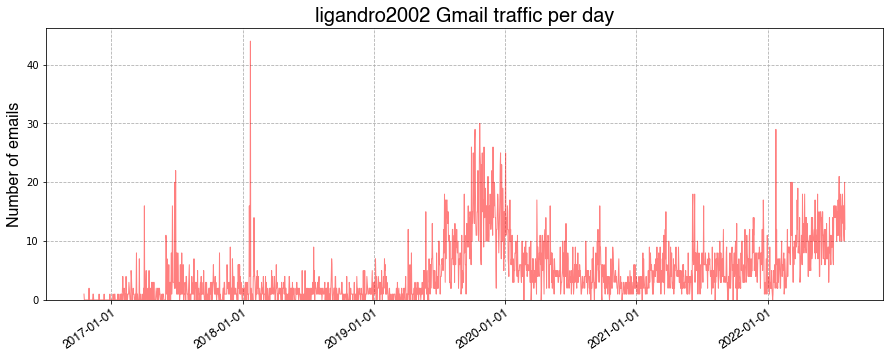

In [56]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=1, alpha=0.5, color='r')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('ligandro2002 Gmail traffic per day', fontproperties=title_font)

plt.show()

## Plot the traffic month by month

In [24]:
# get the count per month
all_months = [x[:-3] for x in all_dates]
month_counts = pd.Series(all_months).value_counts().sort_index()

In [74]:
# not every month necessarily has a message, so fill in missing months in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)
print(month_counts.head())
month_counts.index[:3]

2016-10     3
2016-11     3
2016-12     2
2017-01     8
2017-02    38
dtype: int64


Index(['2016-10', '2016-11', '2016-12'], dtype='object')

In [68]:
# create a series of labels for the plot: each january
xlabels = pd.Series([label if '-01' in label else None for label in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

3     2017-01
15    2018-01
27    2019-01
39    2020-01
51    2021-01
dtype: object

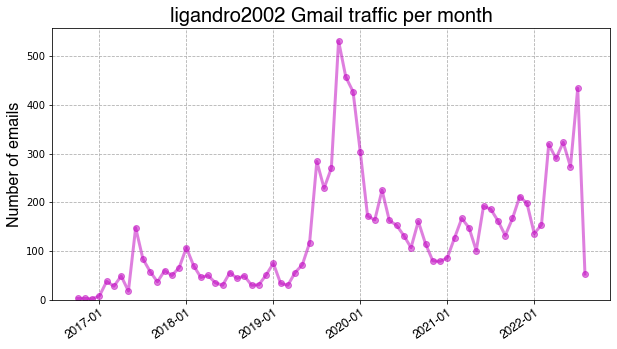

In [66]:
# plot the counts per month
fig = plt.figure(figsize=[10, 5])
ax = month_counts.plot(kind='line', linewidth=3, alpha=0.5, color='m', marker='o', markeredgecolor='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('ligandro2002 Gmail traffic per month', fontproperties=title_font)

plt.show()

## Plot the Gmail traffic by the day of the week

In [30]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


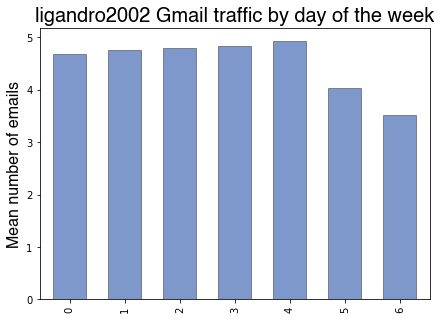

In [49]:
fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, alpha=0.5, color='#003399', edgecolor='#333333', zorder=2)


ax.set_title('ligandro2002 Gmail traffic by day of the week', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Mean number of emails', fontproperties=label_font)

plt.show()

## Plot the Gmail traffic by the hour of the day

In [33]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda x: '{:02}:00'.format(parse_datetime(x).hour))
time_counts = times.value_counts().sort_index()
time_counts.head()

00:00    255
01:00    407
02:00    219
03:00    284
04:00    274
dtype: int64

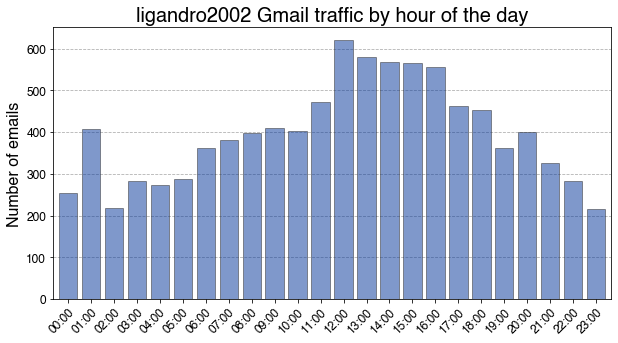

In [46]:
fig = plt.figure(figsize=[10, 5])
ax = time_counts.plot(kind='bar', width=0.8, alpha=0.5, color='#003399', edgecolor='#333333', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('ligandro2002 Gmail traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)

plt.show()

## Plot the Gmail traffic by the minute of the day

In [36]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(parse_datetime(x).hour, parse_datetime(x).minute))
minute_counts = minutes.value_counts().sort_index()

In [37]:
# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)

In [38]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

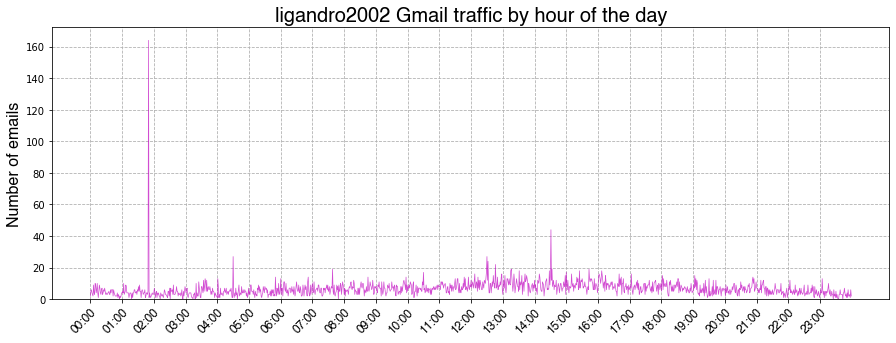

In [48]:
# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('ligandro2002 Gmail traffic by hour of the day', fontproperties=title_font)

plt.show()